In [1]:
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import pandas as pd
import seaborn as sns
import yaml
import tomllib
from common import plot_heatmap, to_matrix, transform
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

with open("plotting_config.toml", "rb") as fp:
    config = tomllib.load(fp)

ox.settings.use_cache = True
ox.settings.log_console = False

In [ ]:
data = pd.read_csv("../data/yj100kmob/yjmob100k-dataset1_sample.csv")
data.head(5)

,uid,d,t,x,y
0,0,0,1,79,86
1,0,0,2,79,86
2,0,0,8,77,86
3,0,0,9,77,86
4,0,0,19,81,89


In [ ]:
print(data.head(5).to_markdown(index=False))

|   uid |   d |   t |   x |   y |
|------:|----:|----:|----:|----:|
|     0 |   0 |   1 |  79 |  86 |
|     0 |   0 |   2 |  79 |  86 |
|     0 |   0 |   8 |  77 |  86 |
|     0 |   0 |   9 |  77 |  86 |
|     0 |   0 |  19 |  81 |  89 |


In [3]:
activity = pd.read_csv("../data/yjmob100k/activity.csv")

activity["count_log"] = activity["count"].apply(np.log10).fillna(0)

In [4]:
unique_users = pd.read_csv("../data/yjmob100k/unique_users.csv")

unique_users["count_log"] = unique_users["count"].apply(np.log10).fillna(0)

In [5]:
activity_raster = to_matrix(activity, value="count_log")
user_raster = to_matrix(unique_users, value="count_log")

activity_raster_fixed = transform(activity_raster)
user_raster_fixed = transform(user_raster)

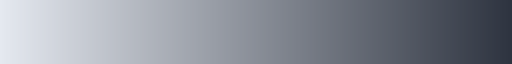

In [15]:
colors = ['#e5e9f0', '#2e3440']
positions = [0, 1]
cmap = LinearSegmentedColormap.from_list('nord-based', list(zip(positions, colors)))
cmap

In [48]:
a_mx = pd.pivot_table(activity, index="x", columns="y", values="count_log").fillna(0).to_numpy()
u_mx = pd.pivot_table(unique_users, index="x", columns="y", values="count_log").fillna(0).to_numpy()

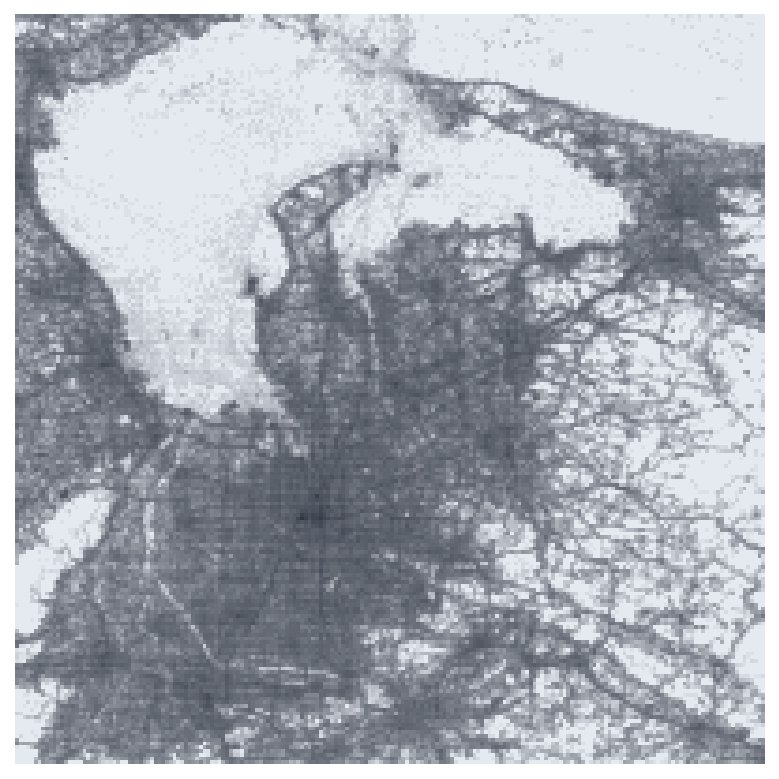

In [ ]:
fig = plt.figure(figsize=(5, 5), dpi=150)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, xticks=[], yticks=[])
ax.margins(0)
_ = ax.axis("off")
sns.heatmap(a_mx, cmap=cmap, cbar=False, square=True, ax=ax)
for i in ["png"]:
    fig.savefig(
        f"../figures/activity_heatmap.{i}", metadata=config["metadata"][i], pad_inches=0
    )

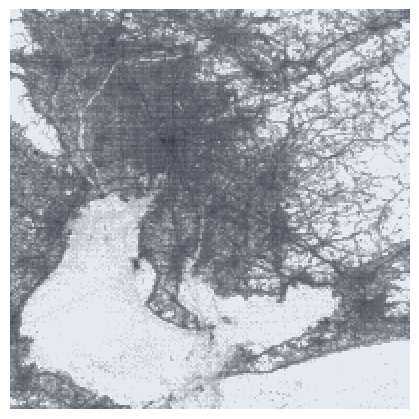

In [23]:
fig = plt.figure(figsize=(4, 4), dpi=100)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, xticks=[], yticks=[])
ax.margins(0)
_ = ax.axis("off")
sns.heatmap(activity_raster_fixed, cmap=cmap, cbar=False, square=True, ax=ax)
for i in ["png"]:
    fig.savefig(
        f"../figures/activity_heatmap_fixed.{i}", metadata=config["metadata"][i], pad_inches=0
    )

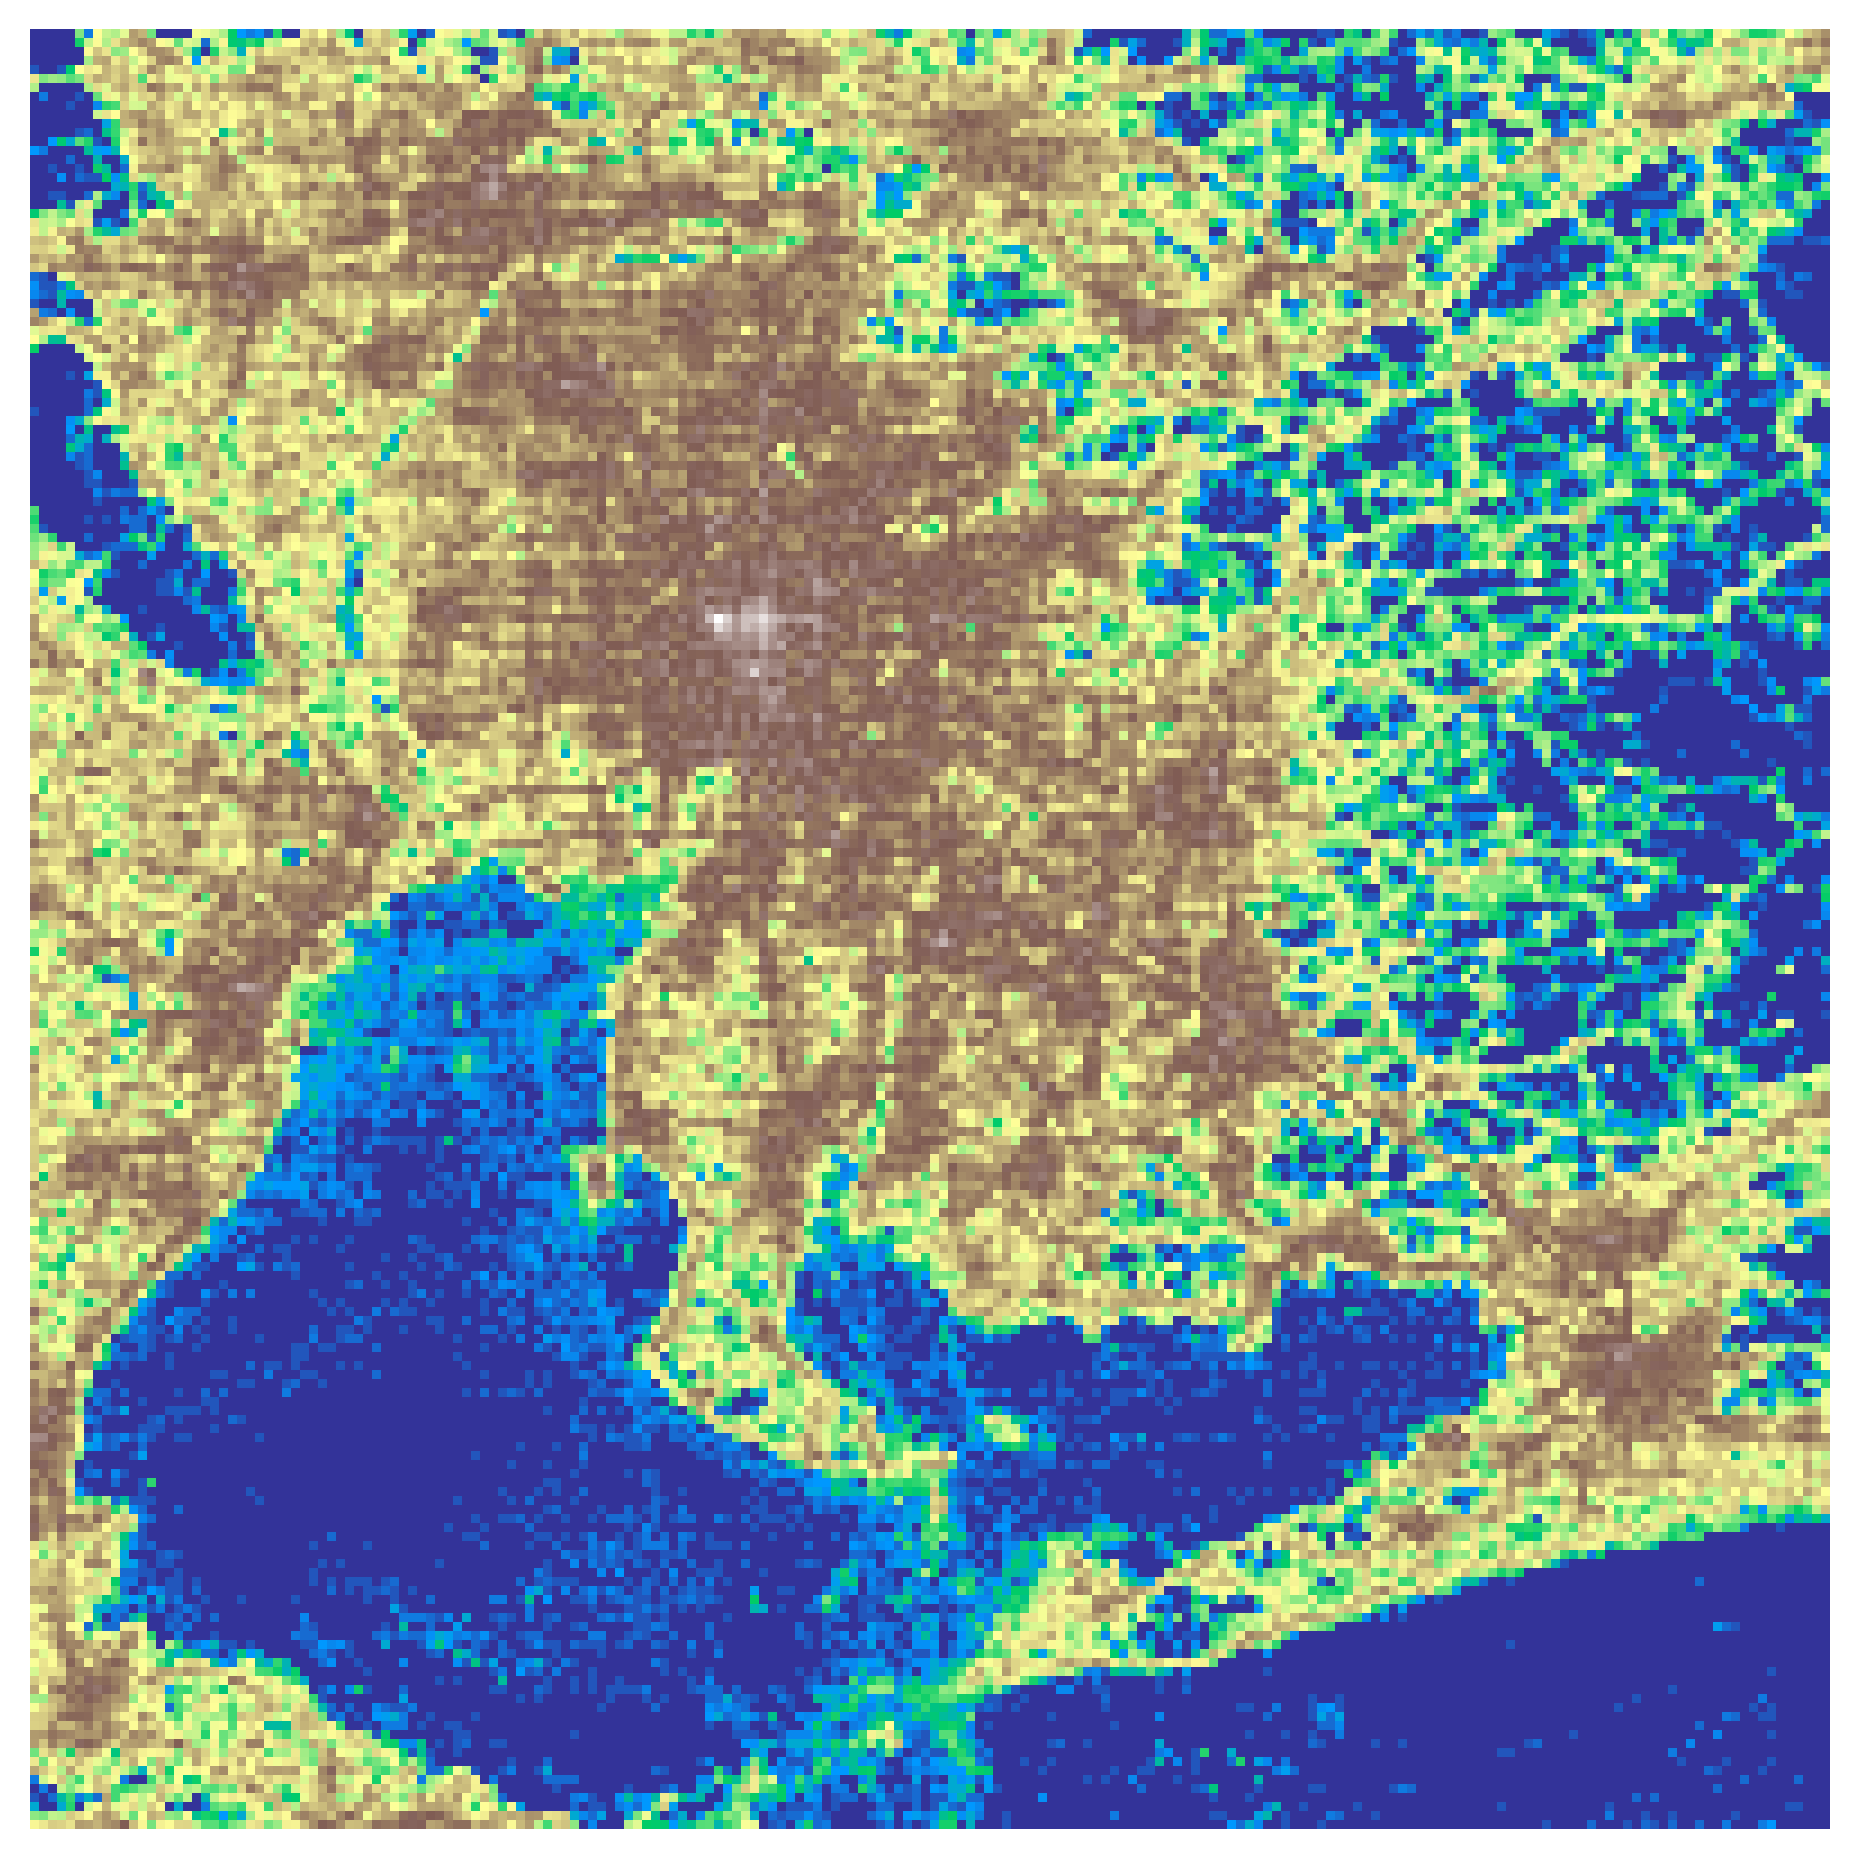

In [8]:
fig = plt.figure(figsize=(6, 6), dpi=300)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, xticks=[], yticks=[])
ax.margins(0)
_ = ax.axis("off")
sns.heatmap(activity_raster_fixed, cmap="terrain", cbar=False, square=True, ax=ax)
for i in ["png"]:
    fig.savefig(
        f"../figures/rescale/original.{i}", metadata=config["metadata"][i], pad_inches=0
    )

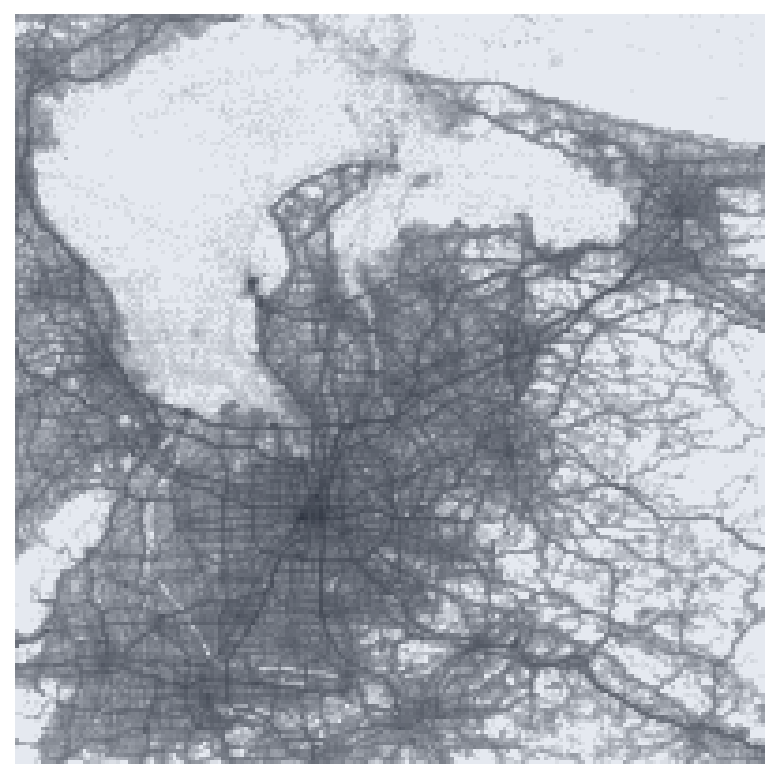

In [49]:
fig = plt.figure(figsize=(5, 5), dpi=150)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, xticks=[], yticks=[])
ax.margins(0)
_ = ax.axis("off")
sns.heatmap(u_mx, cmap=cmap, cbar=False, square=True, ax=ax)
for i in ["png"]:
    fig.savefig(
        f"../figures/user_heatmap.{i}", metadata=config["metadata"][i], pad_inches=0
    )

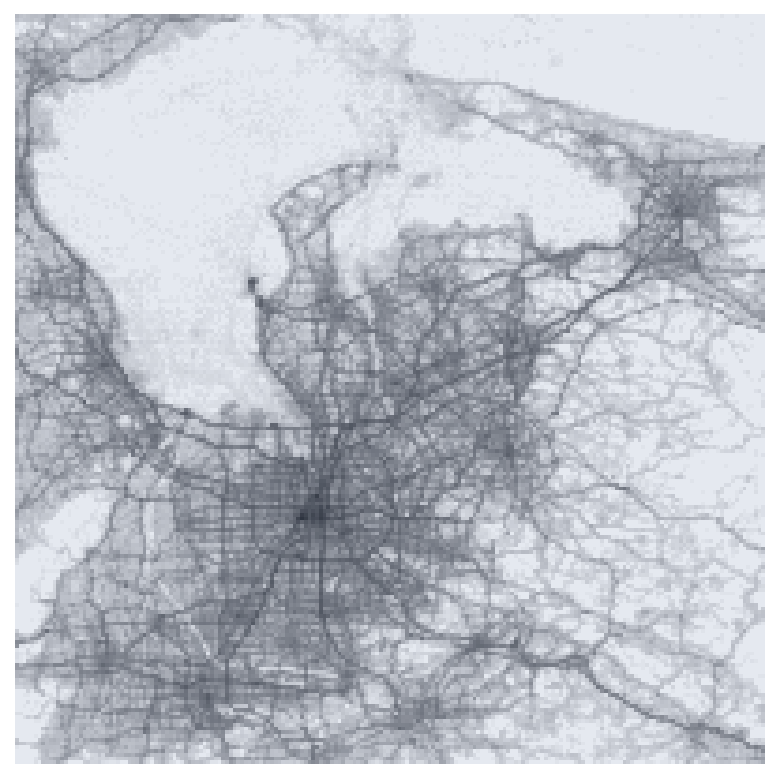

In [50]:
colors = ['#e5e9f0', "#b6bac3", '#2e3440']
positions = [0, 0.5, 1]
cmap_road = LinearSegmentedColormap.from_list('nord-based', list(zip(positions, colors)))

fig = plt.figure(figsize=(5, 5), dpi=150)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, xticks=[], yticks=[])
ax.margins(0)
_ = ax.axis("off")
sns.heatmap(u_mx, cmap=cmap_road, cbar=False, square=True, ax=ax)
for i in ["png"]:
    fig.savefig(
        f"../figures/user_heatmap_v2.{i}", metadata=config["metadata"][i], pad_inches=0
    )

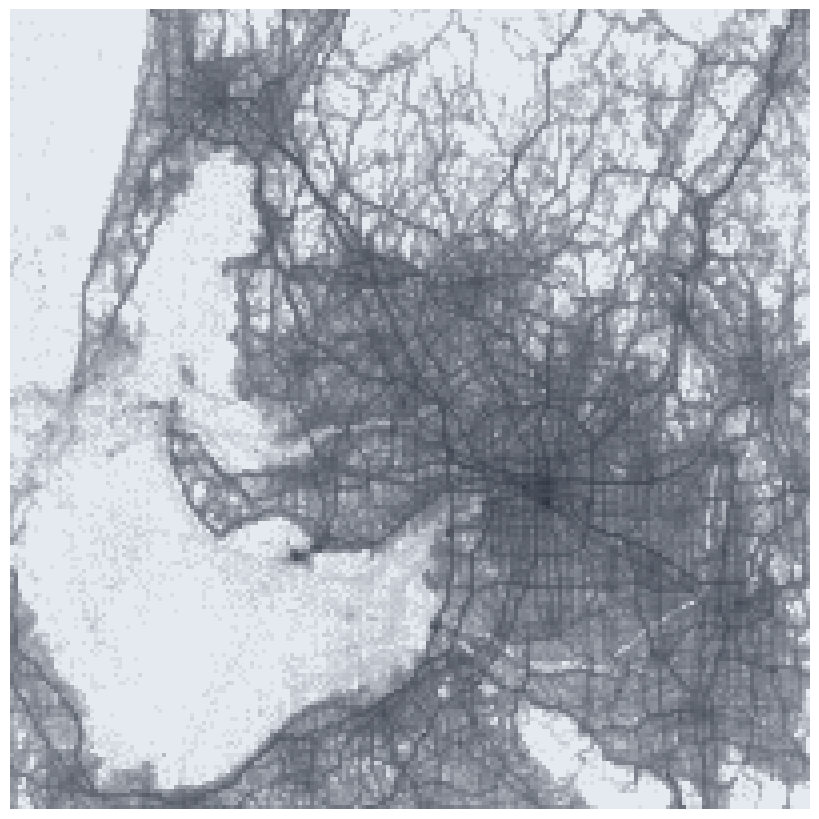

In [51]:
user_raster_rotated = np.rot90(user_raster, k=1)
f_uh2, a_uh2 = plot_heatmap(user_raster_rotated, cmap=cmap)
f_uh2.savefig(
    "../figures/user_heatmap_rot.png", dpi=150, metadata=config["metadata"]["png"]
)

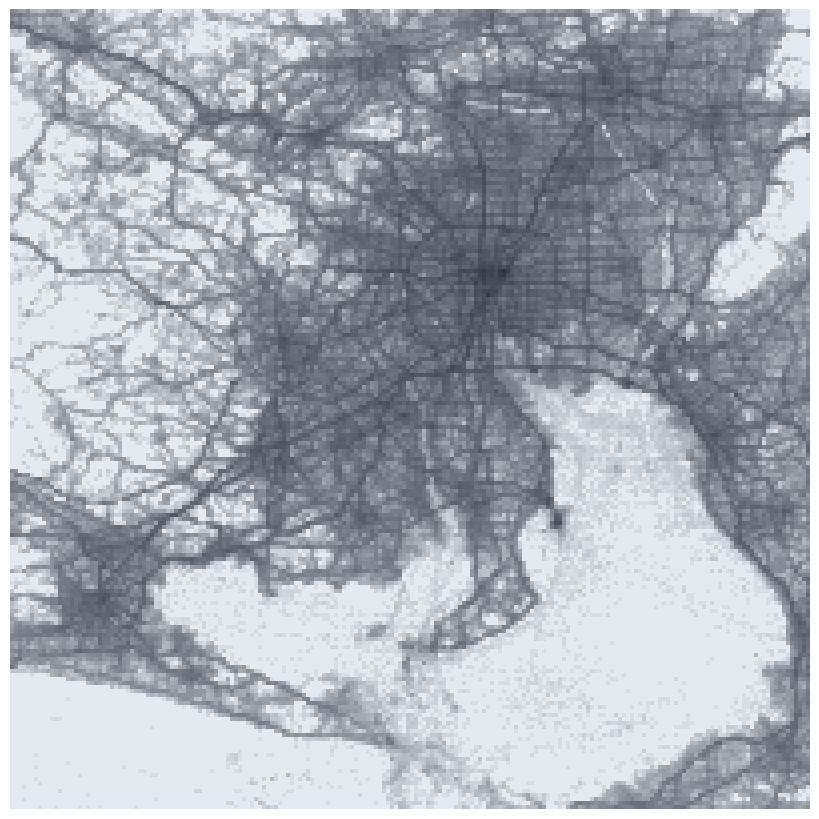

In [ ]:
user_raster_rotated = np.rot90(user_raster, k=2)
f_uh2, a_uh2 = plot_heatmap(user_raster_rotated, cmap=cmap)
f_uh2.savefig(
    "../figures/user_heatmap_rotrot.png", dpi=150, metadata=config["metadata"]["png"]
)

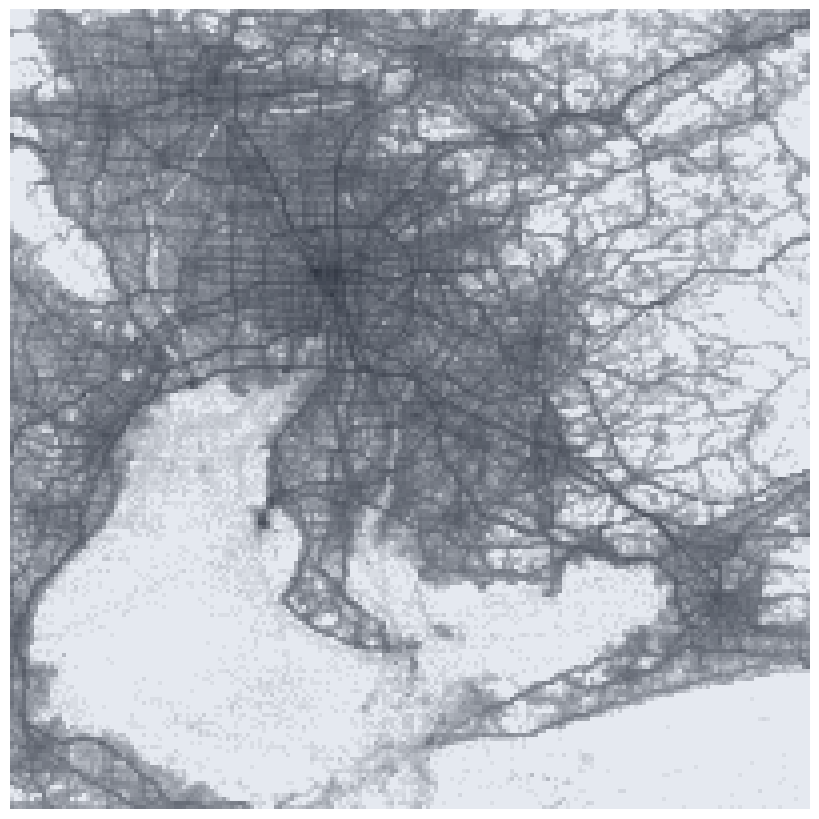

In [54]:
f_uh2, a_uh2 = plot_heatmap(user_raster_fixed, cmap=cmap)
f_uh2.savefig(
    "../figures/user_heatmap_fixed.png", dpi=300, metadata=config["metadata"]["png"]
)

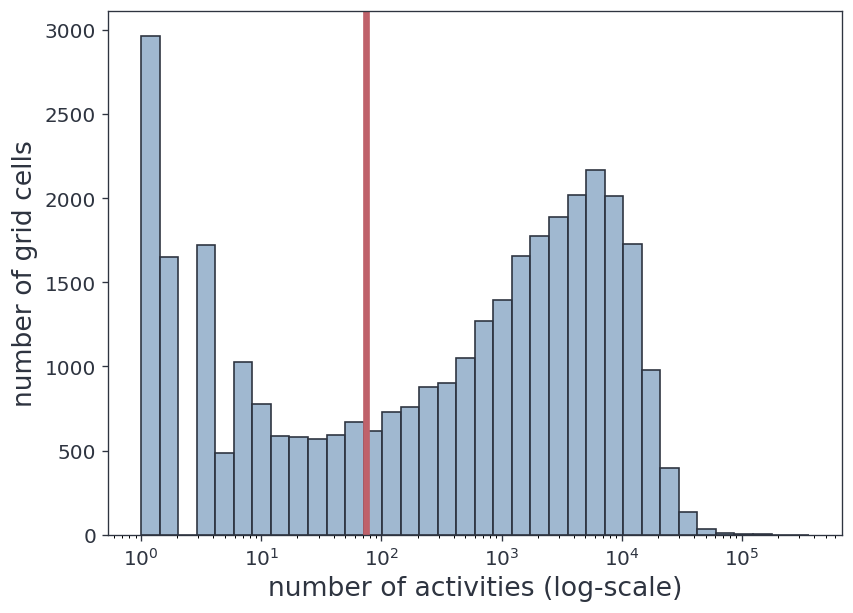

In [33]:
fig_ah, ax_ah = plt.subplots(figsize=(7, 5), layout="constrained", facecolor="none", dpi=120)
sns.histplot(activity["count"], log_scale=(True, False), color="#81a1c1", ec="#2e3440", ax=ax_ah)
ax.margins(0)
ax.set_xlim([0, 50000])
ax_ah.set_xlabel("number of activities (log-scale)", fontsize=16, color="#2e3440")
ax_ah.set_ylabel("number of grid cells", fontsize=16, color="#2e3440")
ax_ah.spines['bottom'].set_color("#2e3440")
ax_ah.spines['top'].set_color("#2e3440")
ax_ah.spines['left'].set_color("#2e3440")
ax_ah.spines['right'].set_color("#2e3440")
ax_ah.tick_params(axis='x', colors="#2e3440", labelsize=12)
ax_ah.tick_params(axis='y', colors="#2e3440", labelsize=12)
ax_ah.set_facecolor("none")
for i in config["formats"]:
    fig_ah.savefig(
        f"../figures/activity_histogram.{i}", metadata=config["metadata"][i]
    )
ax_ah.axvline(75, color="#bf616a", lw=4)
for i in config["formats"]:
    fig_ah.savefig(
        f"../figures/activity_histogram_threshold.{i}", metadata=config["metadata"][i]
    )

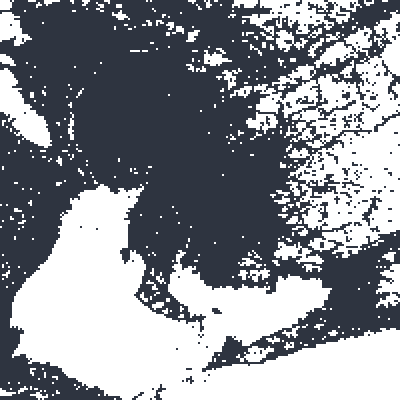

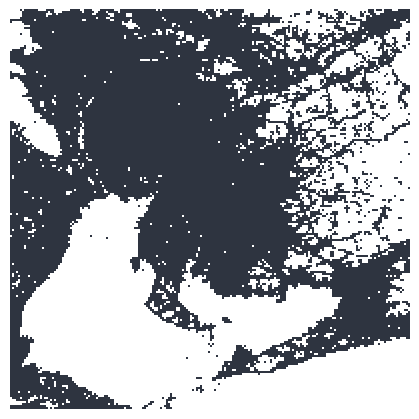

In [19]:
activity["cut"] = activity["count"].apply(lambda x: 0 if x < 75 else 1)
activity_raster_bin = to_matrix(activity, value="cut")
activity_raster_bin = transform(activity_raster_bin)

f_b, _ = plot_heatmap(activity_raster_bin, figsize=(400, 400), dpi=1, cmap=ListedColormap(['#ffffff', '#2e3440']))
f_b.savefig(
    "../figures/activity_cut.png",
    facecolor="white",
    pad_inches=0,
    metadata=config["metadata"]["png"],
)
f_b, _ = plot_heatmap(activity_raster_bin, figsize=(4, 4), dpi=100, cmap=ListedColormap(['#ffffff', '#2e3440']))
f_b.savefig(
    "../figures/activity_cut_dpi_fixed.png",
    facecolor="white",
    pad_inches=0,
    metadata=config["metadata"]["png"],
)

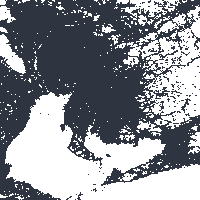

In [18]:
activity["cut"] = activity["count"].apply(lambda x: 0 if x < 75 else 1)
activity_raster_bin = to_matrix(activity, value="cut")
activity_raster_bin = transform(activity_raster_bin)

f_b, _ = plot_heatmap(activity_raster_bin, figsize=(200, 200), dpi=1, cmap=ListedColormap(['#ffffff', '#2e3440']))
f_b.savefig(
    "../figures/activity_cut_200.png",
    dpi=1,
    facecolor="white",
    pad_inches=0,
    metadata=config["metadata"]["png"],
)